In [15]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
import string
import re
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.corpus import stopwords

# loading the data
data = pd.read_csv('C:/Users/LENOVO/Desktop/disaster_tweets.csv')
copy = data   #It is often advisable to keep a copy of the data

disaster = data[data.target == 1]  #extracting only the records that are labelled 1 (disaster)

disaster[10:15]

,id,keyword,location,text,target
10,16,NaN,NaN,Three people died from the heat wave so far,1
11,17,NaN,NaN,Haha South Tampa is getting flooded hah- WAIT ...,1
12,18,NaN,NaN,#raining #flooding #Florida #TampaBay #Tampa 1...,1
13,19,NaN,NaN,#Flood in Bago Myanmar #We arrived Bago,1
14,20,NaN,NaN,Damage to school bus on 80 in multi car crash ...,1


If take a peek at the data then we see for the column `keyword` there are records for which keyword is missing. We fill these missing values with 'unknown'. Here we may be interested in finding out the keywords with maximum frequency which may give us an idea of what most tweets are talking about. 

In [16]:
# Filling NaN values with Unknown
data.fillna('Unknown', axis = 1, inplace = True)

# whitespaces are escaped as %20 therefore we need to take care of that
space = re.compile(r'%20')
keywords_ = []
for word in disaster.keyword:
    w = space.sub(r'',str(word))
    keywords_.append(w)

# Futher cleaning the keywords of special and numeric characters
clean = re.compile(r'[!@#$%^&*?,()_:;.-/0123456789]')
keywords = []
for word in keywords_:
    w = clean.sub(r'',str(word))
    keywords.append(w)

In [17]:
# We use Porter Stemmer to stem the keywords. This is needed as, for example, words like flood and flooding mean the same thing.
# Stemmer stemmed both these words to flood.
stemmer = PorterStemmer()
stemmed_keywords =[]
for word in keywords:
        stemmed_keywords.append(stemmer.stem(word))

In [18]:
#storing all the keywords in a single corpus. This is needed as wordcloud takes data in string format.

keywords = ''  
for word in stemmed_keywords:
    keywords = keywords+word+' '

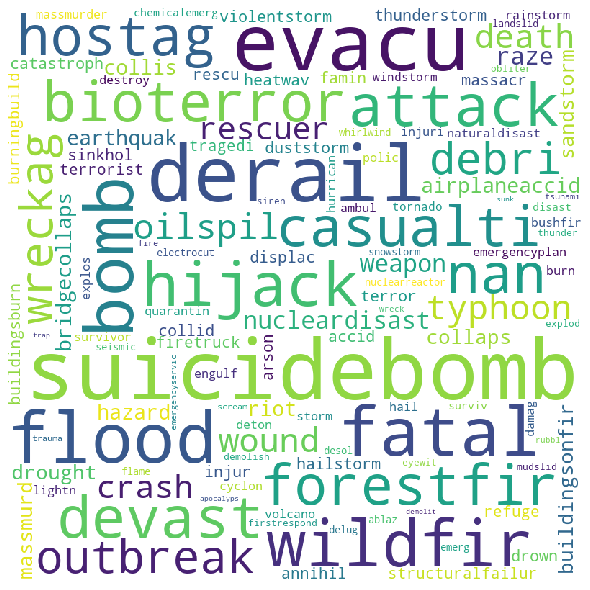

In [19]:
# Initialoizing word cloud object
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white',collocations=False,
                     stopwords = STOPWORDS, min_font_size = 10).generate(keywords)

# playing with layout
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

    Many words on the word cloud may appear to be trimmed or incomplete. This is because of the Porter Stemmer we used earlier. But this does not mean we can't draw insights from the word cloud.

   # Some Points To Note on Word Cloud

    1. From the above world cloud it is clear that the top five frequent keywords are suicidebomb, evacuation, derail, flood    and fatal.
    
    2. Note that this word cloud can be futher refined by combining the words which more or less mean the same thing. 
       For example wildfire and forestfire have the same semantic but these words are differntly shown in the cloud.
       
    3. Infact if we find frequency distribution of the words in the corpus (see the code below) frequency of wildfire is 56 and that of forest fire is 42. The total is 98 which is more than the frequency of suicidebomb!! What do we do?
    
    4. Well to get rid of this problem we have to work and code more. Computers do not really understand the true meaning of the words and therefore we bring together words which have the same meaning.
    
    5. Here there are only 165 unique keywords after we apply the stemmer. It will take an hour or so to bring such words together. What to do if there are thousands of unique keywords? Comment below.

In [20]:
dist = FreqDist(keywords.split())
dist.most_common(10)

[('suicidebomb', 94),
 ('evacu', 85),
 ('derail', 82),
 ('flood', 66),
 ('fatal', 62),
 ('bomb', 61),
 ('wildfir', 56),
 ('hijack', 50),
 ('attack', 46),
 ('devast', 45)]

In [21]:
# Replacing the some of the words which have similar meaning

keywords = keywords.replace('wildfir','wildfire')
keywords = keywords.replace('seismic','earthquak')
keywords = keywords.replace('forestfir', 'wildfire')
keywords = keywords.replace('ablaz','ablaze')
keywords = keywords.replace('blaze','ablaze')
keywords = keywords.replace('arsonist','arson')
keywords = keywords.replace('blewup','blownup')
keywords = keywords.replace('bloodi','blood')
keywords = keywords.replace('buildingsonfir','buildingsburn')
keywords = keywords.replace('burningbuild','buildingsburn')
keywords = keywords.replace('wreckag','wreck')
keywords = keywords.replace('collis','collid')
keywords = keywords.replace('terrorist','terror')
keywords = keywords.replace('devast','destroy')
keywords = keywords.replace('damag','destroy')
keywords = keywords.replace('destruct','destroy')
keywords = keywords.replace('demolish','destroy')
keywords = keywords.replace('demolit','destroy')

# Look at thefrequency of words after cleaning
dist = FreqDist(keywords.split())
dist.most_common(10)

[('destroy', 108),
 ('wildfire', 98),
 ('suicidebomb', 94),
 ('evacu', 85),
 ('derail', 82),
 ('buildingsburn', 73),
 ('flood', 66),
 ('fatal', 62),
 ('bomb', 61),
 ('collid', 55)]

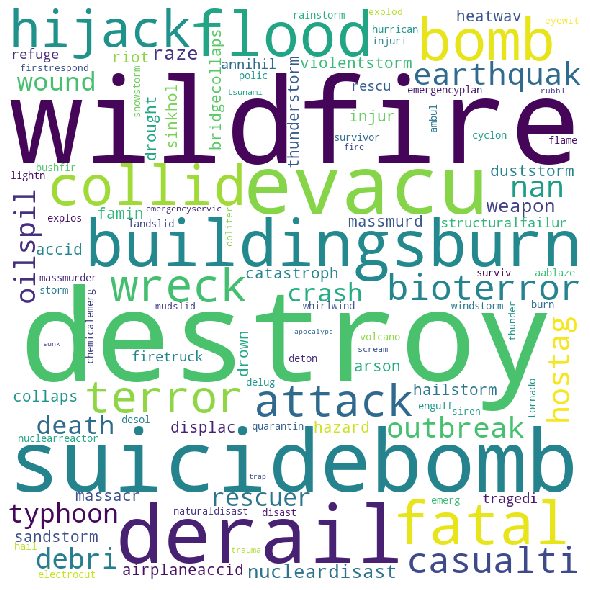

In [22]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white',collocations=False,
                     stopwords = STOPWORDS, min_font_size = 10).generate(keywords)

# playing with layout
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Analysis of Word Cloud

     1. The most frequent keywords tell us that most of the tweets are about destruction as highlighted by the keyword destroy. Next highest frequecies are of wildfire, suicidebomb, evacuation and derailment. Evacuation is done as soon as there is a natural calamity or a man made disaster. It makes sense why the keyword evacuation is in top five.
     
     2. Governments can look into prevention of wildfire by having good water supply in the areas prone to wildfires and thus saving flora and fauna of the area.
    
     3. Governments can set up various bomb detector machines in public places or expertise in the related field can be employed to detect such activities beforehand. 
     
     4. Fire in buildings is also one of the major cause of disaster.

# Word Cloud For Text

In [23]:
corpus =""
for text in disaster.text:
    corpus = corpus+text+" "
    
# Cleaning the text of urls,html tags and punctuations.

def remove_url(corpus):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', corpus)

def remove_html(corpus):
    return re.sub(r'<.*?>', r'', corpus)

def remove_special(corpus):  
    clean = re.compile(r'[!@#$%^|&*?,(\')_:;.\-/0123456789]')
    return clean.sub(r'',corpus)

corpus = remove_url(corpus)
corpus = remove_html(corpus)
corpus = remove_special(corpus)

In [24]:
from nltk.corpus import stopwords  

# Removing stopwords

corpus = corpus.lower()
text=''
stops = set(stopwords.words('english'))
for word in corpus.split(): 
    if word not in stops:
        text = text + word +' '

# Stemming the words in the corpus

stemmer = PorterStemmer()
corpus =[]
for word in text.split():
        corpus.append(stemmer.stem(word))

text = ''
for word in corpus:
    text= text + word +' '

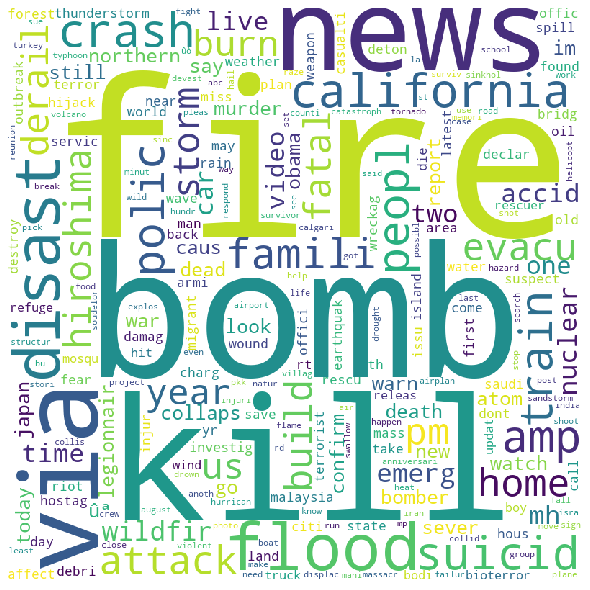

In [25]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white',collocations=False,max_words = 3100,
                      normalize_plurals = False,stopwords = STOPWORDS, min_font_size = 10).generate(text)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Analysis of Word Cloud

     1. The most frequent word is fire. Fire is the most common collateral phenomenon that occurs during a disaster. Hence it tops the list here. 
     
     2. Also wildfire and suicidebombing is one of top things people have tweeted about and therefore this result agrees with the previous word cloud.
     
## Note:
     The cloud can be futher refined by combining the words with similar semantic. In this case there are about thousands of unique words and at present I don't know an efficient way to do this. Please comment below if you know how to go about this.